# Used Car Classifier

The following is the procedure for building a Machine Learning model for predicting car prices using US car listings.<br>

<br>
The complete (huge) datset consists of around 3 million listings for cars for sale and was procured in September 2020. The data contains 66 attributes for each listing.<br>
<br>
The task is to create a regression model to accurately predict the listing price of a car based on its attributes. The process can be broken down into the following steps:<br>
- Import any major relevant packages which will be used.
- Assess the data. This involves visualising, exploring correlations and distributions. 
- Clean the data. Deal with any potential issues within the dataset, missing values, encoding etc. 
- Test models. Approximate the performance of various models, using an appropriate statistical measure of performance.
- Run the model on test data. After insight is gained into the best performing model, run the model on the test data to deliver a final result.

## Import

The first step is to import the main relevant packages with which we will be working and importing the csv datafile for analysis.<br>

The main packages we will be working with are:<br>
- <b>pandas</b>: A data science package which allows for the creation and manipulation of dataframes: the main format in which our imported data will be used.
- <b>numpy</b>: A library which streamlines the use of mathematical operations.
- <b>Scikit-Learn</b>: A machine learning library which will provide tools for data cleaning and form the basis of the various models used.
- <b>matplotlib</b>: A graphical library which will allow for visualisation of the data.
- <b>seaborn</b>: Graphical library producing more appealing plots.
<br>

In [2]:
#import packages

import sys
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn seaborn| grep -v 'already satisfied'

import pandas 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read the dataset from a file.
# Specify type 'string' for the 'bed' and 'dealer_zip' attributes, to avoid errors interpreting them as numbers.
cars = pandas.read_csv("used_cars_data_large_4.csv", dtype={"bed": "string", "dealer_zip": "string"})
#cars = pandas.read_csv("/cs/studres/ID5059/Coursework/Coursework-1/data/3_large/used_cars_data_large_4.csv", dtype={"bed": "string", "dealer_zip": "string"})
# Clear the maximum number of columns to be displayed, so that all will be visible.
pandas.set_option('display.max_columns', None)




[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


#### Data Sizes
The dataset size used in the final version of the code is the <b>large</b> set (~ 1 GB). The datasets tested were gradually increased in size throughout the development of this model, including the 10 GB huge set. The 10 GB set was able to be run on traning data and the basic RMSE/Median for each model was found. However, the Cross-Validation RMSE assessment and GridSearchCV were not feasibly able to be completed for the Random Forest regressor with the computational power available. Altering parameters such as the number of model names considered or K folds in the cross validation would allow these processes to be completed, but would sacrifice a great deal in terms of the model's performance and the rigour of the statistical evaluation carried out.<br>
<br>
<b>A comparison of the values obtained using both large and huge datasets is included in the evaluation section at the end of the notebook.</b>

Check the data has been imported correctly by displaying the dataframe.

In [2]:
cars.head()

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,1FBAX2CM1KKA62013,33.7 in,<NA>,NaN,NaN,Van,NaN,Medford,14.0,NaN,58,54451,15 PASSENGER**NEW TIRES****TINTED GLASS**BACKU...,V6,3500.0,V6,White,True,False,True,Ford,41.3 in,25 gal,Gasoline,False,99.2 in,18.0,310.0,Pewter,True,NaN,NaN,False,NaN,45.1380,235.5 in,2020-07-14,WHITE,276497275,-90.3480,https://static.cargurus.com/images/forsale/202...,"['Third Row Seating', 'Steel Wheels', 'Bluetoo...",Ford,15 seats,37000.0,Transit Passenger,1.0,"310 hp @ 5,500 RPM",29000.0,False,1357,4.923077,58466.0,Medford Motors Incorporated,False,"400 lb-ft @ 2,500 RPM",A,6-Speed Automatic,t80704,350 XLT LWB RWD with Sliding Passenger-Side Door,NaN,RWD,Rear-Wheel Drive,147.6 in,97.4 in,2019
1,2FMPK3J95LBA96181,40.6 in,<NA>,NaN,NaN,SUV / Crossover,NaN,Savannah,21.0,NaN,0,31406,Skip the dealership! WE DELIVER!!! Pick out th...,I4,2000.0,I4,Agate Black,NaN,NaN,True,Ford,42.6 in,18.4 gal,Gasoline,NaN,68.3 in,29.0,250.0,Black (Dune),NaN,NaN,NaN,True,NaN,31.9933,188.8 in,2020-09-10,BLACK,281694045,-81.1309,https://imageonthefly.autodatadirect.com/image...,"['Remote Start', 'Parking Sensors', 'Heated Se...",Ford,5 seats,3212.0,Edge,NaN,"250 hp @ 5,500 RPM",35616.0,NaN,0,4.456522,296910.0,J.C. Lewis Ford,NaN,"280 lb-ft @ 3,000 RPM",A,8-Speed Automatic,t87982,SEL FWD,NaN,FWD,Front-Wheel Drive,112.2 in,85.8 in,2020
2,ZACNJBAB0KPJ92061,35.1 in,<NA>,NaN,NaN,SUV / Crossover,NaN,Two Harbors,21.0,NaN,35,55616,[!@@Additional Info@@!]Quick Order Package 2XA...,I4,1300.0,I4,Jetset Blue Clearcoat,False,False,True,Jeep,41.2 in,12.7 gal,Gasoline,False,66.5 in,29.0,177.0,Black,False,NaN,True,False,True,47.0079,166.6 in,2020-08-06,BLUE,278532539,-91.7107,NaN,"['Alloy Wheels', 'Steel Wheels', 'Bluetooth', ...",Jeep,5 seats,14318.0,Renegade,1.0,"177 hp @ 5,750 RPM",19988.0,False,214,3.500000,277336.0,Sonju Superstore,False,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic,t83806,Sport 4WD,NaN,4WD,Four-Wheel Drive,101.2 in,79.6 in,2019
3,WZ1DB4C05LW022626,--,<NA>,NaN,NaN,Coupe,NaN,Savannah,24.0,NaN,331,31419,New Price! 2020 Toyota Supra 3.0[!@@Additional...,I6,3000.0,I6,Absolute Zero,NaN,NaN,True,Toyota,42.2 in,13.7 gal,Gasoline,NaN,50.9 in,31.0,335.0,None,NaN,NaN,NaN,True,NaN,31.9792,172.5 in,2019-10-15,UNKNOWN,255166842,-81.1410,https://static.cargurus.com/images/forsale/202...,"['Leather Seats', 'Navigation System', 'Adapti...",Toyota,2 seats,0.0,Supra,NaN,NaN,55631.0,NaN,0,3.625000,120874.0,Savannah Toyota,NaN,NaN,A,Automatic,t85834,Premium Launch Edition RWD,NaN,RWD,Rear-Wheel Drive,97.2 in,79.8 in,2020
4,5YFEPRAE8LP118677,41.4 in,<NA>,NaN,NaN,Sedan,NaN,Bluffton,30.0,NaN,23,29910,"[!@@Additional Info@@!]Front Wheel Drive,Power...",I4,1800.0,I4,Celestite,NaN,NaN,True,Toyota,42.3 in,13.2 gal,Gasoline,NaN,56.5 in,38.0,139.0,Black,NaN,NaN,NaN,True,NaN,32.2898,182.3 in,2020-08-18,UNKNOWN,279624565,-80.9232,https://static.cargurus.com/images/forsale/202...,"['Adaptive Cruise Control', 'Steel Wheels', 'B...",Toyota,5 seats,0.0,Corolla,NaN,NaN,18966.0,NaN,0,4.619048,373894.0,Stokes Toyota Hilton Head,NaN,NaN,CVT,Continuously Variable Transmission,t85113,LE FWD,NaN,FWD,Front-Wheel Drive,106.3 in,70.1 in,2020


## Assess The Data

The dataset will first be explored using a variety of graphical methods to get a better idea of the distributions in the data and any potential correlations or lack thereof. 

First, a grid of histograms showing the distributions of numerical data columns is produced. 

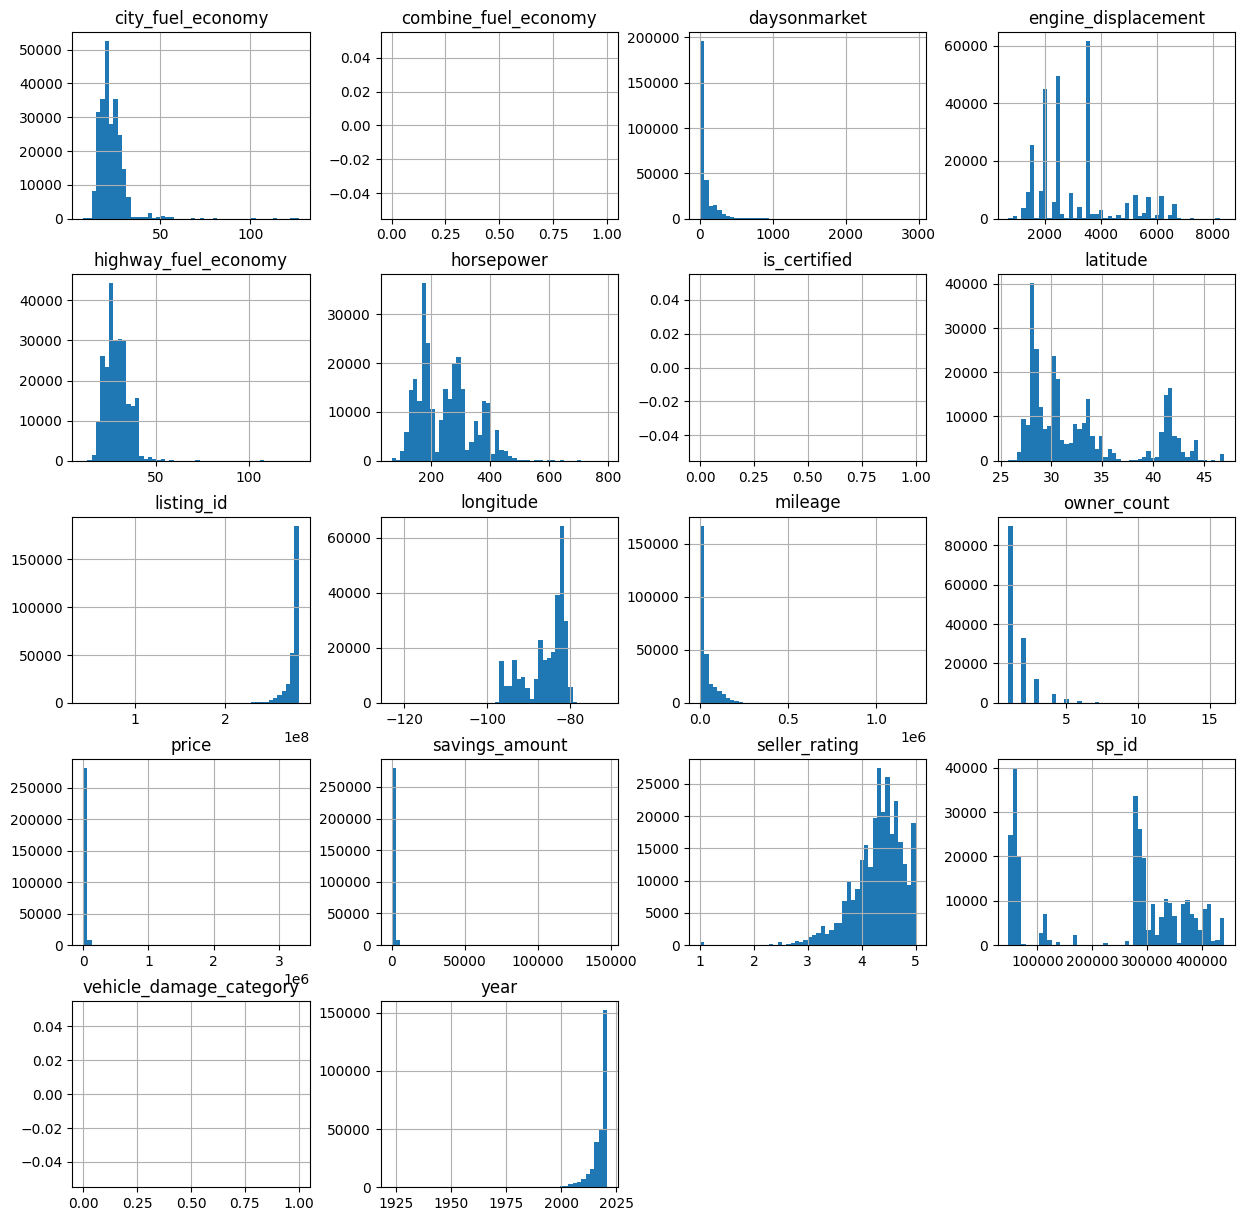

In [3]:
cars.hist(bins=50, figsize=(15,15))
plt.show()

##### Price

As the target for prediction, the overall price distribution of the dataset should definitely be investigated further. The price histogram is shown below.

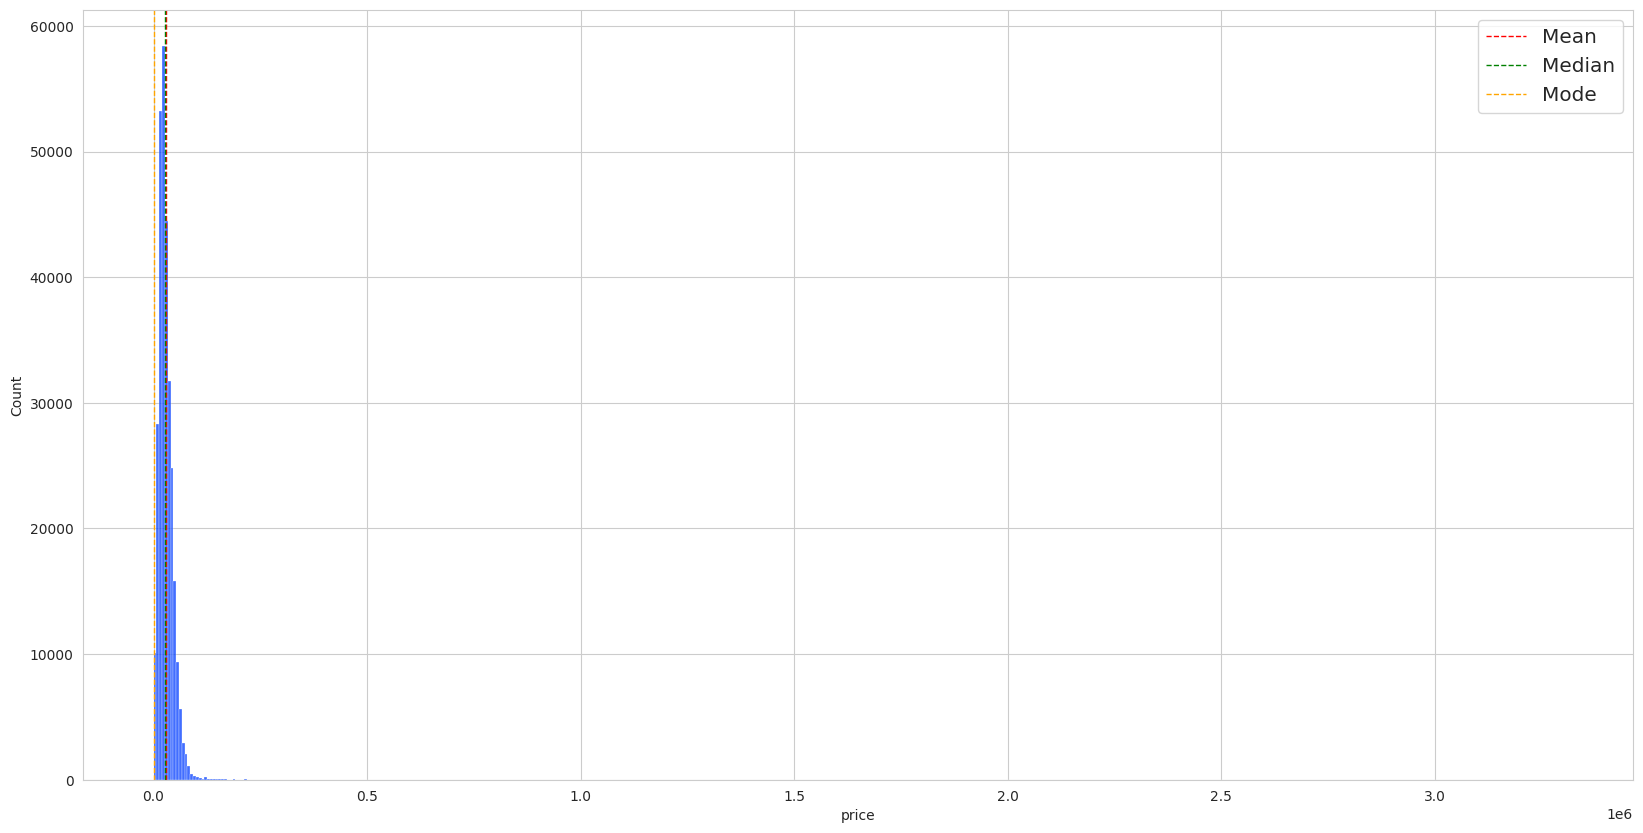

In [4]:
sns.set_style('whitegrid')
sns.set_palette('bright')

fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(data=cars, x='price', bins=500, ax=ax)
ax.axvline(cars['price'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
ax.axvline(cars['price'].median(), color='g', linestyle='dashed', linewidth=1, label='Median')
mode = cars['price'].mode()
ax.axvline(mode.any(), color='orange', linestyle='dashed', linewidth=1, label='Mode')

ax.legend(fontsize='x-large')
plt.show()

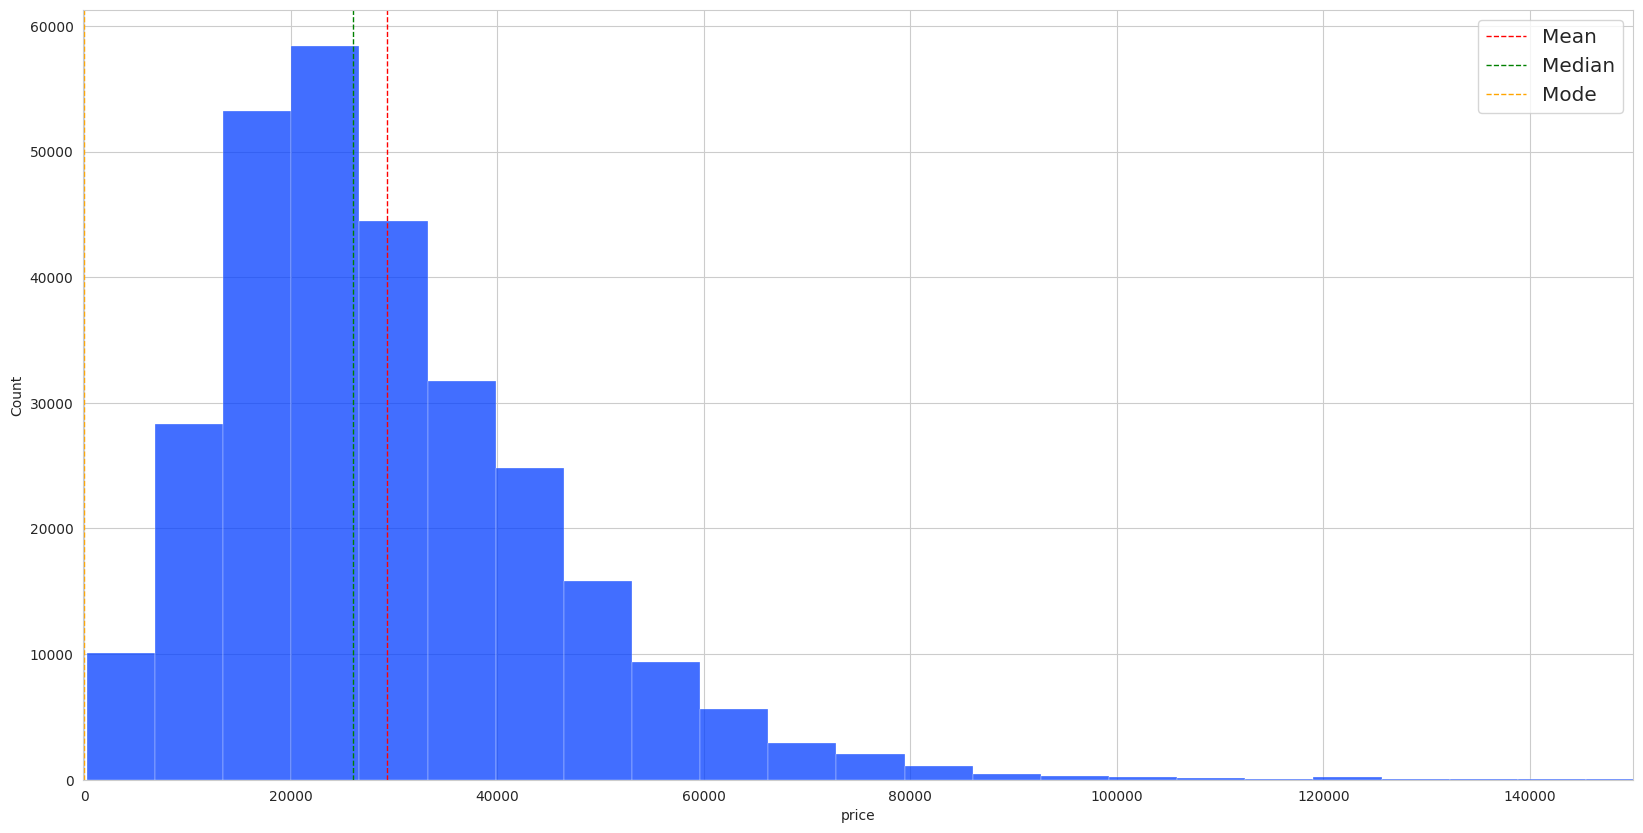

In [5]:
sns.set_style('whitegrid')
sns.set_palette('bright')

fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(data=cars, x='price', bins=500, ax=ax)
ax.axvline(cars['price'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
ax.axvline(cars['price'].median(), color='g', linestyle='dashed', linewidth=1, label='Median')
mode = cars['price'].mode()
ax.axvline(mode.any(), color='orange', linestyle='dashed', linewidth=1, label='Mode')

ax.legend(fontsize='x-large')
ax.set_xlim(-100,150000)
plt.show()

#### Analysis:

The vast majority of price data is contained around $25000, however some extreme outliers are present. This is likely to confuse the model and so a threshold should be set to remove a small portion of the most expensive vehicles from consideration. This should only be done on the training data, so this step will be carried out after the data has been stratified.

##### Mileage

The distributions of the most important attributes should be investigated.<br>
The mileage attribute is obviously going to be an important factor in determining the car price. A zoomed-in histogram is shown to better investigate its distribution.


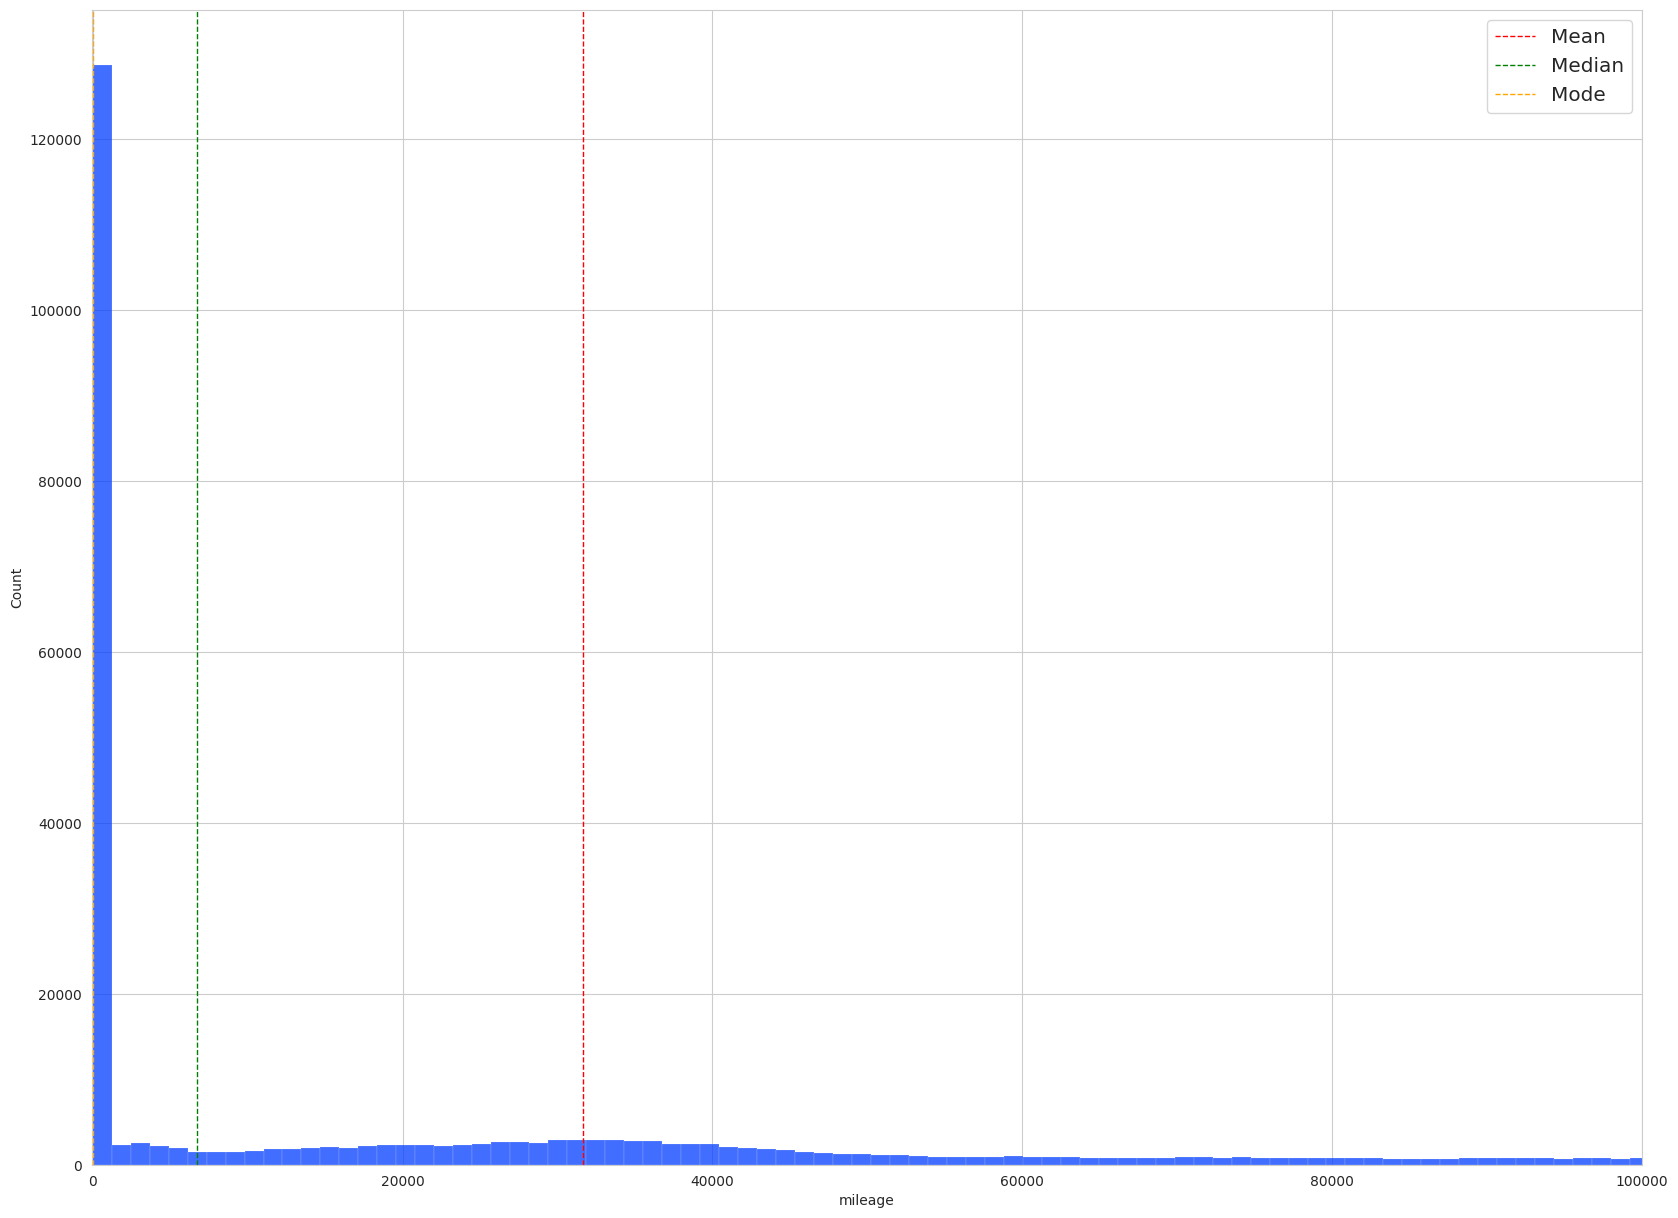

In [6]:
sns.set_style('whitegrid')
sns.set_palette('bright')

fig, ax = plt.subplots(figsize=(20, 15))

sns.histplot(data=cars, x='mileage', bins=1000, ax=ax)
ax.axvline(cars['mileage'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
ax.axvline(cars['mileage'].median(), color='g', linestyle='dashed', linewidth=1, label='Median')
mode = cars['mileage'].mode()
ax.axvline(mode.any(), color='orange', linestyle='dashed', linewidth=1, label='Mode')

ax.legend(fontsize='x-large')
plt.xlim(-50,100000)
plt.show()

#### Analysis:

This distribution for mileage is interesting. It is heavily skewed towards 0, with the majority of cars at 0 mileage.
This presents a subtle issue when addressing missing values later in the process. A 0 mileage value is the most common value for the column and will have a large impact on price due to 0 mileage indicating a new car. This will be addressed later when cleaning the data. 

From the numerical histograms, we can see <b>combine fuel economy, vehicle damage category</b> and <b>is_certified</b> are missing most of their data and so should be dropped from the dataset later on.



The dataset info is displayed to have a look at the entries and the columns and see if anything looks unusual.

In [7]:
cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289685 entries, 0 to 289684
Data columns (total 66 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   vin                      289685 non-null  object 
 1   back_legroom             275203 non-null  object 
 2   bed                      1666 non-null    string 
 3   bed_height               48666 non-null   object 
 4   bed_length               48666 non-null   object 
 5   body_type                288447 non-null  object 
 6   cabin                    4858 non-null    object 
 7   city                     289685 non-null  object 
 8   city_fuel_economy        243245 non-null  float64
 9   combine_fuel_economy     0 non-null       float64
 10  daysonmarket             289685 non-null  int64  
 11  dealer_zip               289685 non-null  string 
 12  description              283678 non-null  object 
 13  engine_cylinders         281240 non-null  object 
 14  engi

There are few columns that appear to have an excessive number of null values, and so are likely not worth considering as the majority of the data will be imputed. 

In [8]:
#Find the columns with the highest number of null values.
nullcount=cars.isna().sum()
nullcountdf=pandas.DataFrame(nullcount)
nullcountdf.head(10).sort_values(by=0,ascending=False)



,0
combine_fuel_economy,289685
bed,288019
cabin,284827
bed_height,241019
bed_length,241019
city_fuel_economy,46440
back_legroom,14482
body_type,1238
vin,0
city,0


From the above table <b>combine_fuel_economy, bed, cabin, bed_height, bed_length </b> are not worth considering as they contain majority null values.

The <b>listed_date</b> attribute is given in the format <b>YYYY-MM-DD</b>, to work with this data more efficiently and check for correlation, we remove the hyphens and conver dtype to integer. 

In [9]:
cars['listed_date']=cars['listed_date'].str.replace('-','').astype(int)

Some columns e.g <b>fuel_tank_volume</b> have units after the numerical value. To test the correlation of these, the units must be removed. This can be achieved by building a function which can extract the numbers from the column entries using regex. We can then check the numerical linear correlations with price.

In [10]:
#Build function to remove units from end of otherwise numeric data

def delunits(df,*args):
    
    for col in args:
        df[col] = df[col].str.extract(r"(\d*\.*\d+)")
        df[col]=pandas.to_numeric(df[col],errors='coerce')
        
#apply function to appropriate cols
delunits(cars,'fuel_tank_volume','back_legroom','front_legroom','height','length','maximum_seating','wheelbase','width')

# However for the torque column the format is slightly different.
# Since there are two numeric values of importance we will take the ratio for consistency.

# extract the torque value from each string in the 'torque' column
torque_values = cars['torque'].str.extract(r'(\d+\s?lb-ft)')[0]

# extract the first numeric value from each torque value
torque_numeric = torque_values.str.extract(r'(\d+)')[0].astype(float)

# extract the RPM value from each string in the 'torque' column
rpm_values = cars['torque'].str.extract(r'(\d+,\d+)\s?RPM')[0]

# remove commas and convert RPM values to float
rpm_numeric = rpm_values.str.replace(',', '').astype(float)

# multiply torque and RPM values to get the final torque values
cars['torque'] = torque_numeric * rpm_numeric


#check correlation of numeric sets

Cars_Corr=cars.corr(numeric_only=True)
Cars_Corr['price'].sort_values(ascending=False)

price                      1.000000
horsepower                 0.601518
fuel_tank_volume           0.425989
wheelbase                  0.425730
length                     0.423137
width                      0.407187
year                       0.397004
engine_displacement        0.396940
is_new                     0.387657
back_legroom               0.379868
height                     0.367467
torque                     0.343857
franchise_dealer           0.289360
maximum_seating            0.151520
front_legroom              0.140031
seller_rating              0.060629
daysonmarket               0.037101
longitude                  0.000394
latitude                  -0.005820
savings_amount            -0.020999
listing_id                -0.033047
listed_date               -0.036626
sp_id                     -0.103308
city_fuel_economy         -0.217408
owner_count               -0.259869
highway_fuel_economy      -0.295632
mileage                   -0.465321
combine_fuel_economy        

This can be presented in a more appealing format using the seaborn library.

Text(0.5, 1.0, 'Numeric Attributes Correlating with Price')

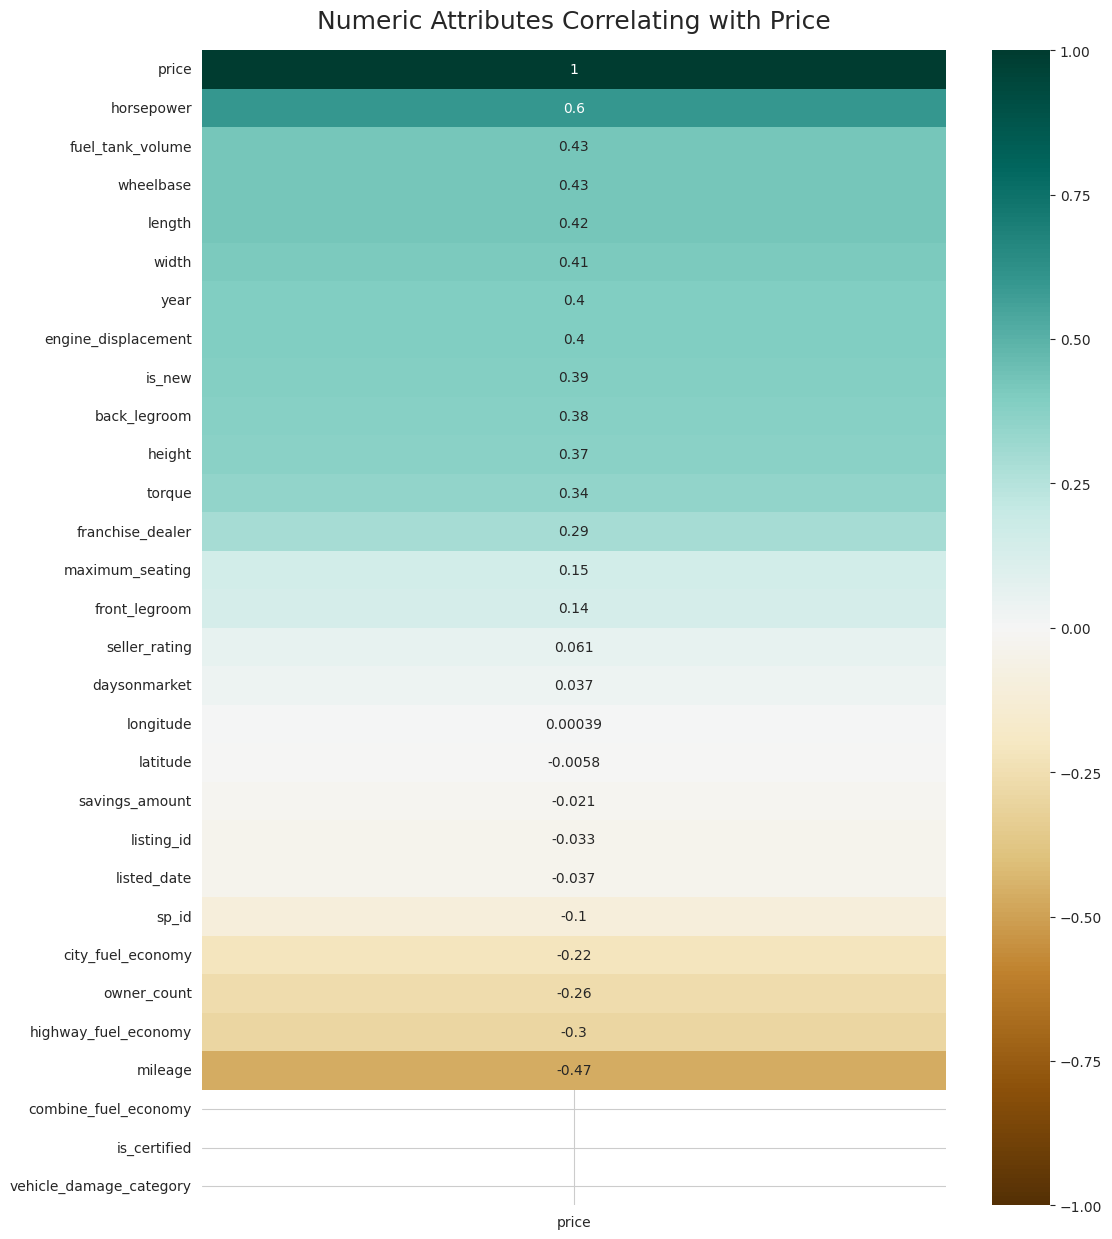

In [11]:
plt.figure(figsize=(12, 15))
heatmap = sns.heatmap(cars.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Numeric Attributes Correlating with Price', fontdict={'fontsize':18}, pad=16)

There are some reasonably correlated values (<b>mileage,horspower</b>), however a lot of numerical values are weakly correlated, if at all. The correlations are visualised below.

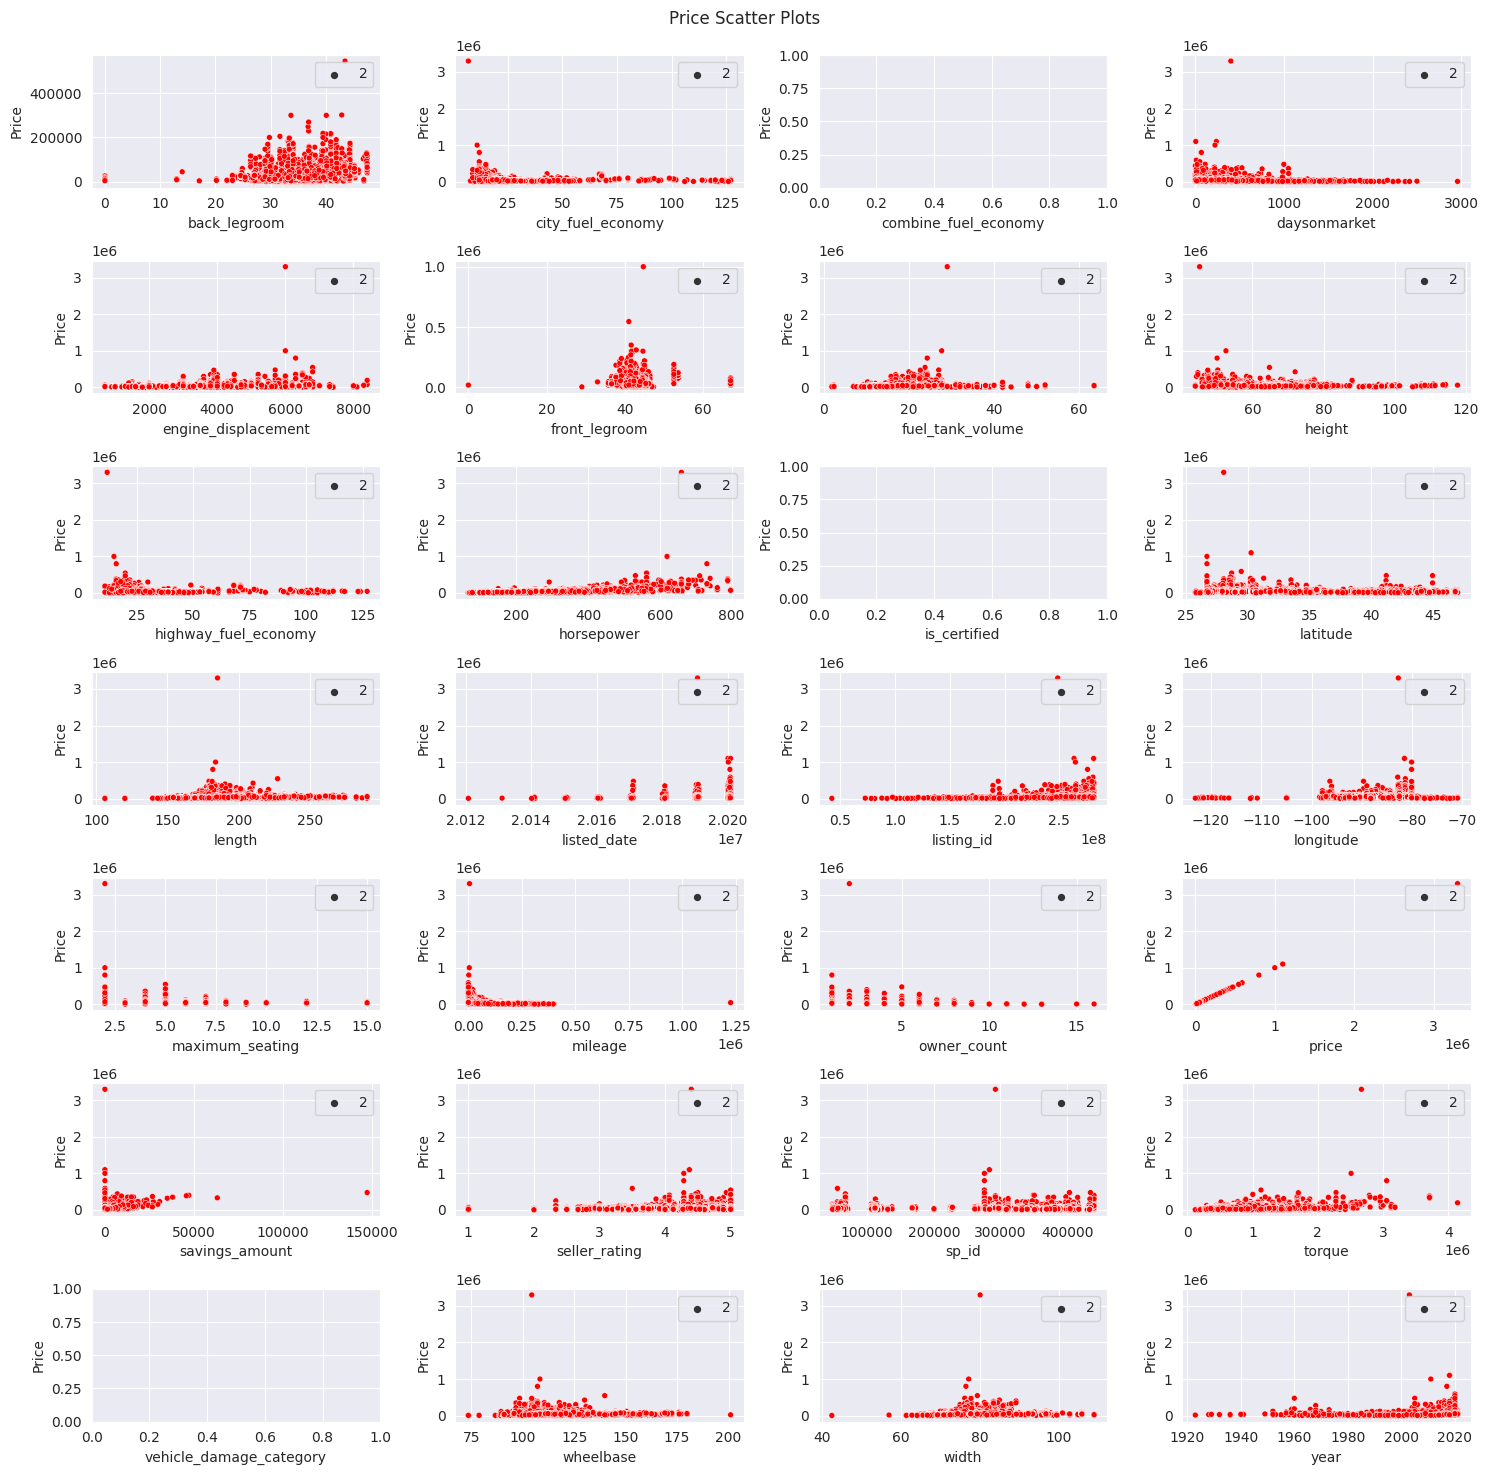

In [12]:
sns.set_style('darkgrid')
sns.set_palette('bright')

carsplot = cars.select_dtypes(include=np.number)

fig, axes = plt.subplots(7, 4, figsize=(15, 15))

for i, col in enumerate(carsplot.columns[:]):
    sns.scatterplot(x=col, y='price', data=cars, ax=axes[i//4, i%4], size=2, color='red')
    axes[i//4, i%4].set_xlabel(col)
    axes[i//4, i%4].set_ylabel('Price')

fig.suptitle('Price Scatter Plots')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()

#### Analysis:

Agreeing with our correlation values, a great deal of the data columns display weak first order linear correlation with price. For the purposes of our model a threshold correlation value should be decided  upon and anything below it removed from the dataset. Note the potential for higher order polynomial fitting, especially in columns such as wheelbase or width.

#### Checking for Irrelevant Values

Display the dataframe again and look for any columns which are clearly irrelevant to price and may confuse the model.

In [13]:
cars.head(10)


,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,1FBAX2CM1KKA62013,33.7,<NA>,NaN,NaN,Van,NaN,Medford,14.0,NaN,58,54451,15 PASSENGER**NEW TIRES****TINTED GLASS**BACKU...,V6,3500.0,V6,White,True,False,True,Ford,41.3,25.0,Gasoline,False,99.2,18.0,310.0,Pewter,True,NaN,NaN,False,NaN,45.1380,235.5,20200714,WHITE,276497275,-90.3480,https://static.cargurus.com/images/forsale/202...,"['Third Row Seating', 'Steel Wheels', 'Bluetoo...",Ford,15.0,37000.0,Transit Passenger,1.0,"310 hp @ 5,500 RPM",29000.0,False,1357,4.923077,58466.0,Medford Motors Incorporated,False,1000000.0,A,6-Speed Automatic,t80704,350 XLT LWB RWD with Sliding Passenger-Side Door,NaN,RWD,Rear-Wheel Drive,147.6,97.4,2019
1,2FMPK3J95LBA96181,40.6,<NA>,NaN,NaN,SUV / Crossover,NaN,Savannah,21.0,NaN,0,31406,Skip the dealership! WE DELIVER!!! Pick out th...,I4,2000.0,I4,Agate Black,NaN,NaN,True,Ford,42.6,18.4,Gasoline,NaN,68.3,29.0,250.0,Black (Dune),NaN,NaN,NaN,True,NaN,31.9933,188.8,20200910,BLACK,281694045,-81.1309,https://imageonthefly.autodatadirect.com/image...,"['Remote Start', 'Parking Sensors', 'Heated Se...",Ford,5.0,3212.0,Edge,NaN,"250 hp @ 5,500 RPM",35616.0,NaN,0,4.456522,296910.0,J.C. Lewis Ford,NaN,840000.0,A,8-Speed Automatic,t87982,SEL FWD,NaN,FWD,Front-Wheel Drive,112.2,85.8,2020
2,ZACNJBAB0KPJ92061,35.1,<NA>,NaN,NaN,SUV / Crossover,NaN,Two Harbors,21.0,NaN,35,55616,[!@@Additional Info@@!]Quick Order Package 2XA...,I4,1300.0,I4,Jetset Blue Clearcoat,False,False,True,Jeep,41.2,12.7,Gasoline,False,66.5,29.0,177.0,Black,False,NaN,True,False,True,47.0079,166.6,20200806,BLUE,278532539,-91.7107,NaN,"['Alloy Wheels', 'Steel Wheels', 'Bluetooth', ...",Jeep,5.0,14318.0,Renegade,1.0,"177 hp @ 5,750 RPM",19988.0,False,214,3.500000,277336.0,Sonju Superstore,False,350000.0,A,9-Speed Automatic,t83806,Sport 4WD,NaN,4WD,Four-Wheel Drive,101.2,79.6,2019
3,WZ1DB4C05LW022626,NaN,<NA>,NaN,NaN,Coupe,NaN,Savannah,24.0,NaN,331,31419,New Price! 2020 Toyota Supra 3.0[!@@Additional...,I6,3000.0,I6,Absolute Zero,NaN,NaN,True,Toyota,42.2,13.7,Gasoline,NaN,50.9,31.0,335.0,None,NaN,NaN,NaN,True,NaN,31.9792,172.5,20191015,UNKNOWN,255166842,-81.1410,https://static.cargurus.com/images/forsale/202...,"['Leather Seats', 'Navigation System', 'Adapti...",Toyota,2.0,0.0,Supra,NaN,NaN,55631.0,NaN,0,3.625000,120874.0,Savannah Toyota,NaN,NaN,A,Automatic,t85834,Premium Launch Edition RWD,NaN,RWD,Rear-Wheel Drive,97.2,79.8,2020
4,5YFEPRAE8LP118677,41.4,<NA>,NaN,NaN,Sedan,NaN,Bluffton,30.0,NaN,23,29910,"[!@@Additional Info@@!]Front Wheel Drive,Power...",I4,1800.0,I4,Celestite,NaN,NaN,True,Toyota,42.3,13.2,Gasoline,NaN,56.5,38.0,139.0,Black,NaN,NaN,NaN,True,NaN,32.2898,182.3,20200818,UNKNOWN,279624565,-80.9232,https://static.cargurus.com/images/forsale/202...,"['Adaptive Cruise Control', 'Steel Wheels', 'B...",Toyota,5.0,0.0,Corolla,NaN,NaN,18966.0,NaN,0,4.619048,373894.0,Stokes Toyota Hilton Head,NaN,NaN,CVT,Continuously Variable Transmission,t85113,LE FWD,NaN,FWD,Front-Wheel Drive,106.3,70.1,2020
5,5GAKRCKD4GJ321593,36.8,<NA>,NaN,NaN,SUV / Crossover,NaN,Greensboro,NaN,NaN,28,30642,*Premium Delivery Service Available. Sanitized...,V6,3600.0,V6,Midnight Amethyst Metallic,False,False,True,Buick,41.3,22.0,Gasoline,False,71.7,NaN,288.0,Black (Ebony),False,NaN,NaN,False,NaN,33.5522,201.9,20200

#### Explanation:

There are a number of columns which should be omitted from the model's consideration.<br>

<b>Vin:</b> Vehicle identifier, no relation to cars price<br>
<b>City:</b> Information contained within longitude and latitude, at a lesser computational cost<br>
<b>Dealer_zip:</b> Similar to above<br>
<b>description:</b> Data in an unstructured format, contains useless data, most of the important details contained within other columns<br>
<b>engine cylinders:</b> Contained within engine type<br>
<b>exterior color:</b> Overly complicated color description, better data format in listing color<br>
<b>franchise make:</b> Contained in make_name<br>
<b>interior color:</b> Large proportion of none listed, similar color description e.g black, jet black, large number of categories which will come at large compuational expense (see cell below)<br>
<b>is_oemcpo:</b> Similar to is certified pre-owned and largely null<br>
<b>listing_id:</b> Irrelevant to car price<br>
<b>main_picture_url:</b> Irrelevant to car price<br>
<b>major_options:</b> Although potentially useful information, difficult to extract and would result in too large a number of sttributes for the column resulting in further computational expense<br>
<b>power:</b> Contained in horsepower<br>
<b>sp_id:</b> Identifier<br>
<b>sp_name:</b> Key data contained in make name, unlikely to influence price<br>
<b>transmission_display:</b> Contained in transmission<br>
<b>trimid:</b> Identifier <br>
<b>trim_name:</b> Contained in transmission and listing colour<br>


In [14]:
cars['interior_color'].value_counts()

Black                                      80091
None                                       36838
Jet Black                                  19070
Gray                                       17583
Black (Ebony)                              12926
                                           ...  
Macchiato Beige/ Espresso Brown Leather        1
Saddle Brown/Black Leather                     1
LE S-AWC                                       1
AMG Saddle Brown MB-Tex                        1
Brown (Espresso)                               1
Name: interior_color, Length: 9500, dtype: int64

#### Removal of Data

The data we chose to remove is now dropped from the dataset.

In [15]:
#drop clearly irrelevant or information which is contained within other columns
cars=cars.drop(columns=['longitude','sp_name','bed','cabin','latitude','listing_id','savings_amount','vin','sp_id','city','dealer_zip','engine_cylinders','description','interior_color','is_oemcpo','listed_date','exterior_color','main_picture_url','major_options','franchise_make','power','transmission_display','trimId','trim_name','bed_height','bed_length','combine_fuel_economy','wheel_system_display'])

In [16]:
#drop anything too weakly correlated (< ±0.20) and columns with majority NaN data
cars=cars.drop(columns=['height','seller_rating','daysonmarket','maximum_seating','front_legroom','city_fuel_economy','vehicle_damage_category','is_certified'])

After the removal process, <b>30</b> of the original 66 columns remain.

## Data Cleaning

Now the issue of missing values must be resolved. This involves deciding on strategies for filling in the NaN values for each column.<br>
<br>
As found earlier when looking at the distribution for the mileage data, it would not be appropriate to simply fill missing values with median, mode or mean values. By considering other related attributes such as <b>owner_count</b> and <b>is_new</b>, we can make the assumption that a 0 mileage value would imply a 0 owner count and a True <b>is_new </b>value. Taking this into consideration we can fill the missing values in a more rigorous way. The remaining missing values will be filled in a more general way later in the process.

In [17]:
# Conditionally fill null values in mileage column
cars.loc[(cars['mileage'].isnull()) & ((cars['owner_count'] == 0) | (cars['is_new'] == True)), 'mileage'] = 0

# Conditionally fill null values in owner_count column
cars.loc[(cars['owner_count'].isnull()) & ((cars['mileage'] == 0) | (cars['is_new'] == True)), 'owner_count'] = 0

# Conditionally fill null values in is_new column
cars.loc[(cars['is_new'].isnull()) & ((cars['mileage'] == 0) | (cars['owner_count'] == 0)), 'is_new'] = True

In the case of binary (True/False) options such as <b>salvage, has_accidents</b>, the columns have a large number of NaN values, however the columns are likely to swing price significantly if true. 
An appropiate strategy for these attributes is to introduce a third option, unspecified.<br>
<br>
For the remaining categorical missing values, since there are less missing it is more appropriate to use the most commonly occuring value to fill in any missing data.

In [18]:
# fill with unknown class 
cars[['salvage','theft_title','has_accidents','frame_damaged','fleet','isCab','is_cpo']]=cars[['salvage','theft_title','has_accidents','frame_damaged','fleet','isCab','is_cpo']].fillna('unspecified')

#remaining categorical attributes have missing values, but these are lesser so we will use the most occuring class to fill the values
# filling with most common class
cars[['wheel_system','transmission','fuel_type','body_type','engine_type']] = cars[['wheel_system','transmission','fuel_type','body_type','engine_type']].apply(lambda x: x.fillna(x.value_counts().index[0]))

The various columns are still currently represented by a variety of data types, and so they are all converted to strings or floats to avoid any errors.

In [19]:
#ensure data types are consistent
cars[['fleet','frame_damaged','franchise_dealer','has_accidents','is_new','theft_title','salvage',
                          'listing_color','make_name','fuel_type','wheel_system','transmission','body_type','engine_type','isCab','is_cpo','model_name']]=cars[['fleet','frame_damaged','franchise_dealer','has_accidents','is_new','theft_title','salvage',
                          'listing_color','make_name','fuel_type','wheel_system','transmission','body_type','engine_type','isCab','is_cpo','model_name']].astype(str)



cars['year']=cars['year'].astype(float)

#### Splitting of The Data

After the data has been assessed, it must be split into a training set and a test set to avoid overfitting. In order to make sure there are no disparities between the sets <b>StratifiedShuffleSplit</b> is used to ensure the price distributions are similar, to match distributions a strongly correlated variable (horsepower) is chosen as the basis for the ShuffleSplit. A 75% training 25% test split is employed.

In [20]:
#Split into training and test sets
from sklearn.model_selection import StratifiedShuffleSplit

#At this stage the horsepower column still contains null values, but simple imputer will fill for a whole 
#dataframe not one column. These are replaced with median values.
cars['horsepower']=cars['horsepower'].fillna(cars['horsepower'].median())


cars["hp_cat"] = pandas.cut(
    cars["horsepower"],
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1,2,3,4,5])

shuffled_data = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.25,
    random_state=42) 
#we want the distributions of data across the test and training sets to be similar
#for modelling these we will use our most strongly correlated attribute (horspower)
[(train_index, test_index)] = shuffled_data.split(cars, cars["hp_cat"])
stratified_train_set = cars.loc[train_index]
stratified_test_set = cars.loc[test_index]

stratified_train_set.drop(columns="hp_cat", inplace=True)
stratified_test_set.drop(columns="hp_cat", inplace=True)

cars = stratified_train_set.copy()


Now the data has been stratified, we will remove the outliers from the training data as discussed previously. We will remove entries of the price column 4 standard deviations above the mean, to avoid highly priced outliers affecting model performance. This could, however, result in the model having a significant drawback: it may be unable to accurately predict unusually highly priced cars. However because the number of outliers being removed is an extremely small fraction (around 99.99% of data is still present), in this case it is appropriate to do so.<br>
<br>
The outliers could be removed from both the training and test data and this would likely yield superior results for our models (lower RMSE), however in doing so we are not truly testing the model's capability and so it would be inappropriate to do so.

In [21]:
#build function that will remove any data outwith a specified number of standard deviations above the mean
def del_outlier(df,col,nsd):
    mean = df[col].mean()
    sd = df[col].std()
        
    df = df[(df[col] <= mean+(nsd*sd))]
    
    return df
        


In [22]:
#apply del_outlier to training data only
del_outlier(cars,'price',4)

,back_legroom,body_type,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,fuel_tank_volume,fuel_type,has_accidents,highway_fuel_economy,horsepower,isCab,is_cpo,is_new,length,listing_color,make_name,mileage,model_name,owner_count,price,salvage,theft_title,torque,transmission,wheel_system,wheelbase,width,year
284752,40.3,Sedan,3500.0,V6,unspecified,unspecified,True,15.8,Gasoline,unspecified,31.0,301.0,unspecified,unspecified,True,195.9,BLACK,Toyota,2076.0,Avalon,0.0,39366.0,unspecified,unspecified,NaN,A,FWD,113.0,72.8,2020.0
276656,40.9,SUV / Crossover,2400.0,I4,unspecified,unspecified,True,18.8,Gasoline,unspecified,29.0,185.0,unspecified,unspecified,True,187.8,SILVER,Hyundai,0.0,Santa Fe,0.0,35225.0,unspecified,unspecified,712000.0,A,FWD,108.9,74.4,2020.0
137490,38.3,Hatchback,1600.0,I4,True,False,False,10.8,Gasoline,False,39.0,109.0,True,unspecified,False,163.0,SILVER,Nissan,31849.0,Versa Note,1.0,11990.0,False,False,470800.0,CVT,FWD,102.4,66.7,2019.0
207988,39.0,Minivan,3600.0,V6,True,False,True,19.0,Gasoline,False,28.0,287.0,True,True,False,203.8,GRAY,Chrysler,16418.0,Pacifica,1.0,32995.0,False,False,1048000.0,A,FWD,121.6,90.4,2019.0
45372,36.1,SUV / Crossover,2400.0,I4,False,False,True,20.5,Gasoline,False,26.0,173.0,False,unspecified,False,192.4,UNKNOWN,Dodge,99000.0,Journey,1.0,9999.0,False,False,664000.0,A,FWD,113.8,83.7,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229782,35.7,SUV / Crossover,1400.0,I4,unspecified,unspecified,True,14.0,Gasoline,unspecified,31.0,138.0,unspecified,unspecified,True,167.6,SILVER,Chevrolet,2.0,Trax,0.0,15316.0,unspecified,unspecified,NaN,A,FWD,100.6,69.9,2020.0
251698,40.5,Sedan,3600.0,V6,False,False,True,18.0,Gasoline,False,27.0,280.0,False,unspecified,False,196.9,UNKNOWN,Buick,124687.0,LaCrosse,1.0,7650.0,False,False,1243200.0,A,FWD,111.7,73.1,2010.0
110521,38.2,SUV / Crossover,1600.0,I4,False,False,True,16.4,Gasoline,False,NaN,175.0,False,True,False,176.2,GRAY,Hyundai,10936.0,Tucson,1.0,24000.0,False,False,292500.0,A,FWD,105.1,72.8,2018.0
48357,34.3,Sedan,2400.0,I4,False,False,False,18.5,Gasoline,True,31.0,201.0,False,unspecified,False,185.6,SILVER,Acura,95726.0,TSX,1.0,11590.0,False,False,731000.0,A,FWD,106.4,72.4,2011.0


In [23]:
cars_labels = cars["price"].copy()
cars.drop(columns="price", inplace=True)

#### Too Many Models:

Something we have yet to consider is the number of different models in the <b>model_name category</b>. The car model is an attribute which will definitely aid the model in predicting price, but with too many different models included, the computational expense will be far too high. 

In [24]:
counts=cars['model_name'].value_counts()
counts

F-150              11947
Silverado 1500      6064
1500                5266
Equinox             4969
Corolla             3816
                   ...  
L300                   1
GS Hybrid              1
R/V 1500 Series        1
CT6-V                  1
Mariner Hybrid         1
Name: model_name, Length: 966, dtype: int64

To circumvent this, only the top 350 most regularly occuring models will be considered. The majority of the benefit from the model_name catgeory will come from the regressor having information on the most regualry occuring model names, with little gained from models that occur less often. This maintains the integrity of our choice of attributes while also allowing the regressor to be run more efficiently on larger data sets.

In [25]:
counts = cars['model_name'].value_counts()

# get the top 250 most occurring values
top300 = counts[:350].index.tolist()

# replace the values that are not in the top 250 with 'toomany' using negation operator ~
cars.loc[~cars['model_name'].isin(top300), 'model_name'] = 'toomany'


The final steps in the data cleaning process involve filling the missing numerical values, for which we will use an imputer with the median strategy, standardising the numeric values and encoding the categorical attributes. For encoding we choose the one hot encoder, which will encode the individual different values in our categoric data into seperate columns and output a sparse matrix.<br>
<br>
We wrap this all in a preparation pipeline to streamline the transformation process of cleaning our data.

In [26]:
#Build a pipeline using Column Transformer to simulataneously impute median values for NaNs in numerical data, scale it
#and also encode the categorical data. The output is a sparse matrix, which we convert to an array.


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#define pipeline for transforming numerical data
numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('scaler', StandardScaler()),
    ])

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#define what columns are numeric and categroric
numerical_attributes = ['fuel_tank_volume','horsepower','length','mileage','year','highway_fuel_economy','owner_count','engine_displacement','back_legroom','wheelbase','width','torque']
categorical_attributes = ['fleet','frame_damaged','franchise_dealer','has_accidents','is_new','theft_title','salvage',
                          'listing_color','make_name','fuel_type','wheel_system','transmission','body_type','engine_type','isCab','is_cpo']#model_name]

#Use column tranformer to simultaneously apply tranformation to both types of attributes
full_pipeline = ColumnTransformer([
    ("numerical", numerical_pipeline, numerical_attributes),
    ("categorical", OneHotEncoder(handle_unknown='ignore'), categorical_attributes),
])

#apply to data
#output will be a sparse matrix so convert to an array
cars_prepared = full_pipeline.fit_transform(cars)
cars_prepared=cars_prepared.toarray()

In [27]:
#check the data is as we expect
pandas.DataFrame(cars_prepared).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175
0,-0.553713,0.569972,0.055222,-0.608574,0.544336,0.310884,-0.736361,0.370410,0.688968,-0.203476,-0.738486,-0.253461,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.000395,-0.736234,-0.341268,-0.653582,0.544336,-0.002829,-0.736361,-0.446053,0.878005,-0.480725,-0.532352,-0.527528,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-1.477228,-1.592024,-1.555213,0.036906,0.295296,1.565738,0.205031,-1.039844,0.058844,-0.920268,-1.524372,-1.112529,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.037336,0.412326,0.441922,-0.297639,0.295296,-0.159686,0.205031,0.444634,0.279387,0.378072,1.528986,0.287398,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.314390,-0.871359,-0.116101,1.492743,-0.700864,-0.473400,0.205031,-0.446053,-0.634293,-0.149378,0.665801,-0.643946,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

## Test Models

### Linear Regression

After the data has been prepared, we want to assess a selection of different models to find that which performs best. The first model to be assessed is linear regression. The testing of models will be done using the training data to get an approximation of how they will perform. The linear regression model fits a linear model to minimise residual summed squares between the targets in the provided data and the predicted targets.

In [28]:

#start with linear regression, we are using our training data for convenience just to rougly assess performance
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(cars_prepared, cars_labels)


LinearRegression()

#### Performance Indicator

A basic measure for performance is the Root Mean Squared Error divided by the median. The closer to 0, the better the model is performing.<br>
<br>
The RMSE is given by:<br>
<br>

$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n(y_i - \hat{y}_i)^2}$$

$ y_i$ - $ \hat{y_i} $ denotes the difference between observed and predicted.

Specifically, a small RMSE indicates low residuals when a model is applied to test data and that the model is a good fit for the training data.


RMSE is an appropriate measure for assessing our model performance for the following reasons: 
  -	RMSE is easy to interpret. The lower the value of the RMSE, the better it is performing. Additionally RMSE is presented in the same units as the target data (US dollars).  
  -	RMSE penalises large deviations from price rather than smaller deviations. In the case of car prices large deviations will have a more significant impact on the overall ability of our model. 

In [29]:
#find the RMSE for linreg on the training set

from sklearn.metrics import mean_squared_error

linear_regression_cars_predictions = linear_regression.predict(cars_prepared)
linear_regression_mse = mean_squared_error(cars_labels, linear_regression_cars_predictions)
linear_regression_rmse = np.sqrt(linear_regression_mse)


np.round(linear_regression_rmse / cars_labels.median(), 2)


0.41

### Tree Regressor

The linear regression model performed did not yield very accurate results, but the other models should be assessed to compare. We will next assess the tree regressor. Due to a tendency to overfit, the tree regressor cannot be assessed in the same way and so K-fold cross validation is used to compare the model.<br>
<br>
Put simply, the tree regressor works on an iterative process which breaks the dataset down into progressively smaller sub-sets. The result is a decision tree which consists of decision nodes and leaf nodes. The decision nodes have branches leading to a further decision node (an attribute of a column) or a leaf node (representing a numerical target). <br>
<br>
K cross fold vaildation, splits the dataset being looked at into K number of folds, and trains the data based on K-1 folds, which is then tested on the remaining fold. The error for this combination of folds is found and then an average of the K 'scores' is found. This average is the cross-validation error and will be used to the assess the model's performance.

In [30]:
#next try a tree regressor model asessing error using cross validation

from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(cars_prepared, cars_labels)

from sklearn.model_selection import cross_val_score

K = 10

tree_regressor_scores = cross_val_score(tree_regressor, cars_prepared, cars_labels,
                         scoring="neg_mean_squared_error", cv=K)
tree_regressor_rmse_scores = np.sqrt(-tree_regressor_scores)

def display_scores(scores):
    print("Scores:", np.round(scores))
    print("Mean:", np.round(scores.mean()))
    print("Standard deviation:", np.round(scores.std()))

display_scores(tree_regressor_rmse_scores)




Scores: [21602.  5651.  6260.  6401.  9493.  9400.  6107.  8985.  7102.  7871.]
Mean: 8887.0
Standard deviation: 4448.0


In [31]:
linear_regression_scores = cross_val_score(linear_regression, cars_prepared, cars_labels,
                                           scoring="neg_mean_squared_error", cv=K)
linear_regression_rmse_scores = np.sqrt(-linear_regression_scores)
display_scores(linear_regression_rmse_scores)



Scores: [8.88673348e+10 6.12167065e+12 9.34538919e+10 6.60329168e+10
 1.05710000e+04 4.28297592e+11 7.01685238e+10 2.26843931e+12
 1.54148075e+12 8.49200000e+03]
Mean: 1067841098595.0
Standard deviation: 1838568439977.0


These massive scores are likely due to collinearity (multiple variables being correlated with each other) in the training set, we can try to resolve this using slightly different linear model, the Ridge regression model.<br>
<br>
This version of linear regression can handle multi-collinearity in data, which is what was causing the large cross validation scores for the linear model. These large scores were the result of collinearity creating huge variances, causing predictions to be well off target. 

In [32]:
from sklearn.linear_model import Ridge
rreg=Ridge(alpha=1.0)
rreg.fit(cars_prepared, cars_labels)

ridge_regression_scores = cross_val_score(rreg, cars_prepared, cars_labels,
                                           scoring="neg_mean_squared_error", cv=K)
ridge_regression_rmse_scores = np.sqrt(-ridge_regression_scores)
display_scores(ridge_regression_rmse_scores)



Scores: [21807.  7988.  8856.  8280. 10558.  8679.  8512.  9533.  8863.  8479.]
Mean: 10156.0
Standard deviation: 3944.0


From the updated linear model scores, we can see the decision tree model is outperforming.

### Random Forest

Finally, we will test the Random Forest regressor. A Random Forest model operates by creating a series of decision trees and taking an average of their outputs. This model has various hyperparameters than can be altered, for now the  number of estimators is set to 50.

In [33]:
#test random forest regressor in a similar way


from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(n_estimators=50,  random_state=42)

forest_regressor.fit(cars_prepared, cars_labels)
forest_regressor_cars_predictions = forest_regressor.predict(cars_prepared)
forest_regressor_mse = mean_squared_error(cars_labels, forest_regressor_cars_predictions)
forest_regressor_rmse = np.sqrt(forest_regressor_mse)

np.round(forest_regressor_rmse / cars_labels.median(), 2)


0.15

This is a satisafctory value for RMSE over median and is lower than the values yielded by other models.

In [34]:

forest_regressor_scores = cross_val_score(forest_regressor, cars_prepared, cars_labels,
                                          scoring="neg_mean_squared_error", cv=K)
forest_regressor_rmse_scores = np.sqrt(-forest_regressor_scores)
display_scores(forest_regressor_rmse_scores)

Scores: [19809.  4469.  5649.  4759.  8797.  6772.  7872.  7257.  8079.  5816.]
Mean: 7928.0
Standard deviation: 4188.0


This remains a high cross-validation score, however the standard deviation is also high, likely the result of one fold having predictions much further off-target than others.

In comparison of all the models, the Random Forest has the best RMSE/median score and a superior cross validation score. Linear Regression was inferior to the others, even when the ridge model was used to circumvent multi-collinearity. Indicating a linear regressor may potentially be too simplistic for this dataset. These tests have so far only been performed on the training data. To get a useful idea of how the models perform they must be run using the <b>test data</b>. <br>
<br>
Due to its superior performance, <b>the Random Forest regressor will be chosen as our final model</b>.<br>
The forest regressor has hyperparameters which can be optimised using GridSearchCV. This will test several combinations of the hyperparameters and find the best performing one. <br>
<br>
<b>N.B.</b> This process is extremely computationally expensive and takes a long time to complete. Certain lines are commented out to avoid the process running each time and the result is stored in the cell below. 

In [38]:
#the random forest classifier is clearly the best option of the three

#Using gridsearch CV we will determine the optimal hyperparameters for our random forest model

from sklearn.model_selection import GridSearchCV

parameter_grid = [
    # Try 12 (3×4) combinations of hyperparameters:
    {'n_estimators': [10,50,100], 'max_features': [50,80,100,150]},

    # Then try 6 (2×3) combinations with bootstrap set as False:
    {'bootstrap': [False], 'n_estimators': [50,100], 'max_features': [50,100,150]},
]

forest_regressor = RandomForestRegressor(random_state=42)

# Train across 5 folds, giving a total of (12+6)*5=90 rounds of training.
grid_search = GridSearchCV(forest_regressor, parameter_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

#grid_search.fit(cars_prepared, cars_labels)



#final_model = grid_search.best_estimator_

In [41]:
final_model=RandomForestRegressor(bootstrap=False,max_features=250, n_estimators=100, random_state=42)
final_model.fit(cars_prepared, cars_labels)

RandomForestRegressor(bootstrap=False, max_features=250, random_state=42)

Now the model is applied to the test data.

In [42]:
X_test = stratified_test_set.drop("price", axis=1)
y_test = stratified_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test) # Remember to use transform not fit_transform.

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)



In [43]:
np.round(final_rmse / y_test.median(), 2)


0.21

Our final result for RMSE/median is acceptably low, again without indicating overfitting. However a superior statistical measure of performance is finding a confidence interval as it will take into account the variance in errors.

In [44]:

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.round(np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                                        loc=squared_errors.mean(),
                                        scale=stats.sem(squared_errors))))

array([5045., 6049.])

This confidence interval indicates we are 95% sure that the true value of the RMSE lies within the range 5045-6049 dollars.

In [45]:
some_data = X_test_prepared

labs = y_test
preds = final_model.predict(some_data).round()


According to the statistical measures, the model has to a satisfactory extent achieved the goal of predicting the price of a car based on its attributes. This can be better seen by graphing a combined plot of the predicted values and actual prices in the test data.

/tmp/ipykernel_6364/2693142906.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preds, bins=500, color='green', label='Predicted Prices')
/tmp/ipykernel_6364/2693142906.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(labs, bins=500, color='black', label='Actual Prices')


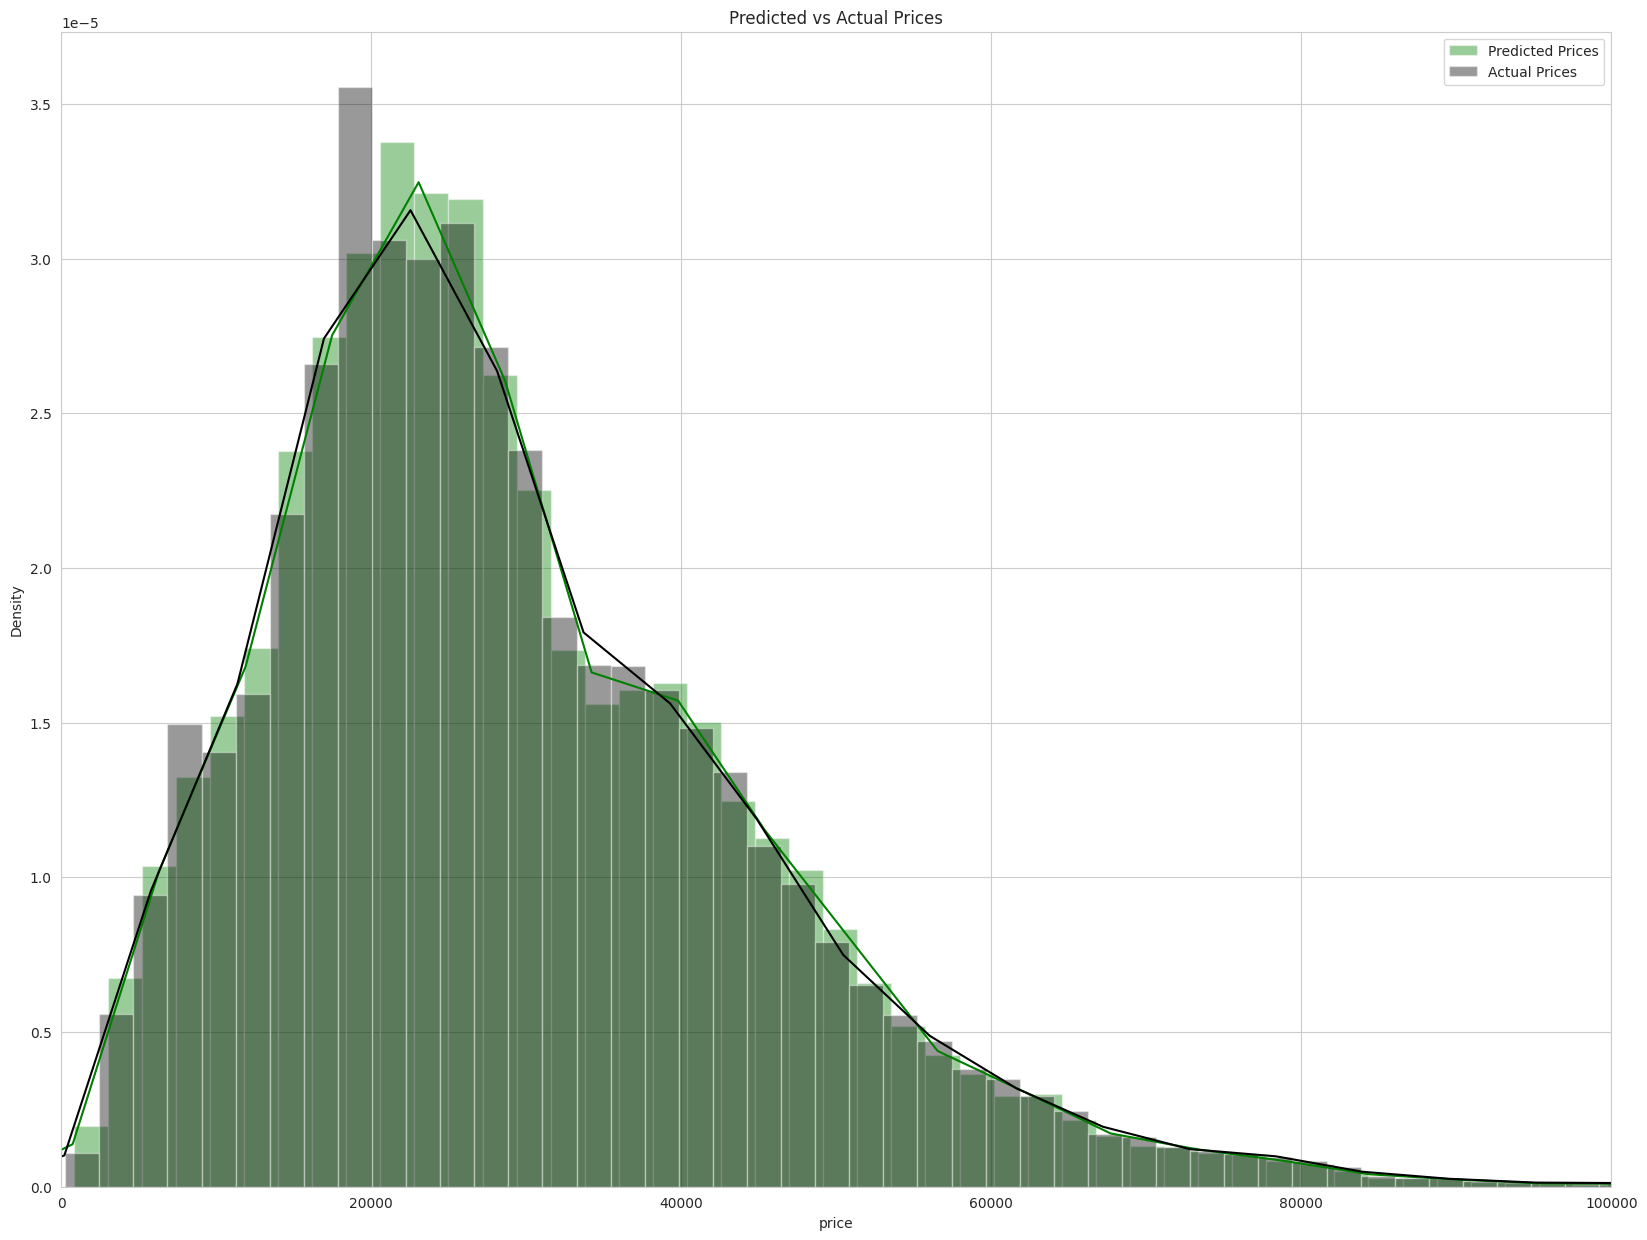

In [47]:
figure = plt.figure(figsize=(20,15))

sns.set_style('whitegrid')
sns.set_palette('bright')

sns.distplot(preds, bins=500, color='green', label='Predicted Prices')
sns.distplot(labs, bins=500, color='black', label='Actual Prices')

plt.xlim(0, 100000)
plt.title('Predicted vs Actual Prices')
plt.legend()

plt.show()

The figure above shows the prices predicted by the random forest model in green and the actual values in grey. The dark green overlap represents the proportion of data which the model accurately predicted. From the information displayed, the largest differences occur in the most populated portion of the data set, at approximately $20000.


## Evaluation of model

### Performance Summary:
#### Large Dataset:
Linear Regression RMSE/Median: 0.41<br>
Linear (Ridge) Regression Cross-Val: Mean: 10156.0<br>
Standard deviation: 3944.0<br>
Tree Regression RMSE/Median: N/A<br>
Tree Regression Cross-Val: Mean: 8887.0<br>
Standard deviation: 4448.0<br>
Random Forest Regression RMSE/Median: 0.15<br>
Random Forest Regression Cross-Val: Mean:7928.0
Standard deviation: 4188.0 <br>
##### Random Forest Test:
RMSE/Median: 0.21 <br>
95% Confidence Interval: 5045-6049

#### Huge Dataset:
##### Training:
Linear Regression RMSE/Median: 0.42<br>
Linear (Ridge) Regression Cross-Val: Mean: 12493.0<br>
Standard deviation: 3903.0<br>
Tree Regression RMSE/Median: N/A<br>
Tree Regression Cross-Val:Mean: 9095.0<br>
Standard deviation: 1308.0<br>
Random Forest Regression RMSE/Median: 0.15<br>
Random Forest Regression Cross-Val: <b>Did not complete</b> <br>
##### Random Forest Test:
RMSE/Median: 0.25 <br>
95% Confidence Interval: 5463-7789



The model does not appear to be over or underfitting, however does not predict with high precision. This may be due to the presence of extremely highly priced cars which as discussed previously, were not included in the training data. These instances will increase the error significantly as the model will not be able to account for them. This is something that could be addressed in future versions. 

In [49]:
#examples of  extreme prices present in test data
stratified_test_set['price'].nlargest(10)

96536     1100000.0
161777     439895.0
145625     424450.0
287842     357554.0
224310     353995.0
86861      339995.0
287833     339413.0
49930      299921.0
287818     294895.0
99152      287130.0
Name: price, dtype: float64

Comparing between datasets, there appears to be a decrease in performance moving from large to huge datasets. This likely due to a greater  scope of data including more price outliers.

### Limitations:     
- Throughout development the model was trained and tested on progressively larger datasets. Initially, the model was able to be trained using the entire cars_models column and performed well doing so. This was viable even for large datasets (around 250,000 entries). When the huge dataset was used, this process became unfeasible for the computational power available. As such, the model is limited by how large the dataset it is investigating is.    

- A further limitation that was found in the test stage that may affect performance is the presence of collinear variables. By including multiple columns which themselves are correlated, this introduces variance and results in the predictions being off target, this was especially apparent when testing the standard linear regression model. An improvement that could be considered is testing each variable for collinearity or the combination of closely related variables (e.g <b>wheelbase, width, height</b>) 

- Another limitation is the simplicity of the linear regression model used. Some columns, while not exhibiting a strong purely linear correlation may have been better described by fitting a higher order polynomial regression system to them. The process of individually fitting polynomials to each column would be a laborious task but would potentially drastically improve the linear regressor’s performance.  